In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
from pycaret.regression import *

In [3]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9663,33302026.0000,5770.7905,0.8011,0.4683,0.4153
1,4503.7339,43746468.0000,6614.1113,0.7456,0.5633,0.4217
2,3880.5540,31795138.0000,5638.7178,0.5974,0.7645,0.4396
3,3747.6453,26805306.0000,5177.3843,0.7762,0.5015,0.5175
4,4471.0425,43410540.0000,6588.6675,0.6771,0.5224,0.3767
5,4182.7573,36166336.0000,6013.8452,0.7674,0.7416,0.4320
6,4081.1008,39192600.0000,6260.3994,0.7333,0.6434,0.4241
7,4928.1533,46415024.0000,6812.8574,0.7448,0.5887,0.4137
8,4609.3130,40370348.0000,6353.7666,0.7392,0.5686,0.5111
9,4665.8657,42596796.0000,6526.6221,0.7256,0.8131,0.4802


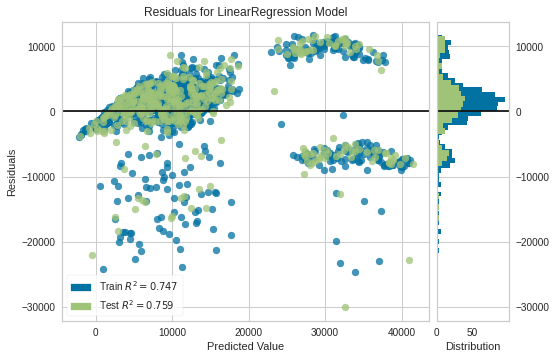

In [5]:
plot_model(lr)

In [6]:
# ------
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [7]:
s2[0].columns

AttributeError: 'str' object has no attribute 'columns'

In [8]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3048.3008,21350260.0000,4620.6343,0.8725,0.3929,0.3176
1,3514.2998,33357626.0000,5775.6060,0.8060,0.4395,0.3341
2,3038.9421,23347494.0000,4831.9243,0.7044,0.5894,0.4070
3,2899.5444,19416284.0000,4406.3911,0.8379,0.4505,0.3899
4,3260.5872,27338142.0000,5228.5889,0.7967,0.4604,0.3160
5,3439.8999,26737398.0000,5170.8218,0.8280,0.4799,0.3091
6,2907.1599,25111992.0000,5011.1865,0.8291,0.3740,0.3073
7,3544.2070,30727126.0000,5543.2056,0.8310,0.4755,0.3121
8,3089.1792,22562846.0000,4750.0366,0.8543,0.3933,0.3282
9,3284.9072,28878232.0000,5373.8472,0.8140,0.5109,0.3685


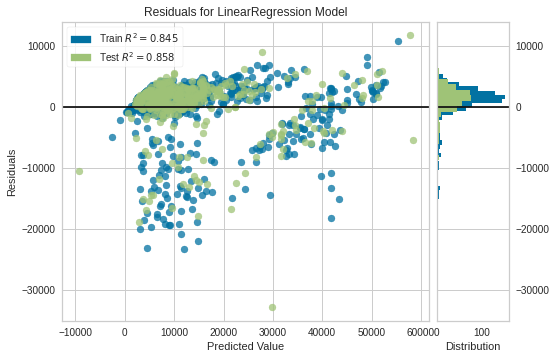

In [9]:
plot_model(lr)

In [10]:
save_model(lr, 'deployment_24052021', model_only = True)

Transformation Pipeline and Model Succesfully Saved


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
 'deployment_24052021.pkl')

In [11]:
deployment_24052021 = load_model('deployment_24052021')

Transformation Pipeline and Model Successfully Loaded


In [12]:
deployment_24052021

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [13]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
